In [1]:
import pandas as pd 
import numpy as np

In [4]:
telco = pd.read_csv('telco.csv')

### 데이터 살펴보기

In [5]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Leave        3333 non-null   int64  
 1   MemberWeeks  3333 non-null   int64  
 2   NewContract  3333 non-null   int64  
 3   IsData       3333 non-null   int64  
 4   DataAmount   3333 non-null   float64
 5   Callcenter   3333 non-null   int64  
 6   CalMins      3333 non-null   float64
 7   CalCounts    3333 non-null   int64  
 8   MonthlyFee   3333 non-null   float64
 9   OverFee      3333 non-null   float64
 10  RoamingMin   3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [6]:
telco.shape

(3333, 11)

- float형 5개와 int형의 6개 총 11열개로, 각 열마다 3333개의 행을 가지고 있다.

### 기술 통계량 한눈에 살펴보기

In [7]:
telco.describe().T

,count,mean,std,min,25%,50%,75%,max
Leave,3333.0,0.144914,0.352067,0.0,0.00,0.00,0.00,1.00
MemberWeeks,3333.0,101.064806,39.822106,1.0,74.00,101.00,127.00,243.00
NewContract,3333.0,0.903090,0.295879,0.0,1.00,1.00,1.00,1.00
IsData,3333.0,0.276628,0.447398,0.0,0.00,0.00,1.00,1.00
DataAmount,3333.0,0.816475,1.272668,0.0,0.00,0.00,1.78,5.40
Callcenter,3333.0,1.562856,1.315491,0.0,1.00,1.00,2.00,9.00
CalMins,3333.0,179.775098,54.467389,0.0,143.70,179.40,216.40,350.80
CalCounts,3333.0,100.435644,20.069084,0.0,87.00,101.00,114.00,165.00
MonthlyFee,3333.0,56.305161,16.426032,14.0,45.00,53.50,66.20,111.30
OverFee,3333.0,10.051488,2.535712,0.0,8.33,10.07,11.77,18.19


- 현재 크게 형변환을 해야하는 것 
1. 0과 1만 존재하여 (int8형 혹은)Category형으로 바꿔야 하는 것
: Leave, NewContract, IsData
2. int64 사이즈에서 줄여야 하는 것 (예상)
: MemberWeeks, Callcenter, CalCounts
2. float64 사이즈에서 줄여야 하는 것 (예상)
: DataAmount, CalMins, MonthlyFee, OverFee, RoamingMin

1. 0과 1만 존재하는 열 형 변환 or 사이즈 변환

In [33]:
telco['Leave'] = telco['Leave'].astype(np.int8)
telco['NewContract'] = telco['NewContract'].astype(np.int8)
telco['IsData'] = telco['IsData'].astype(np.int8)

2. int 타입 사이즈 변환

In [12]:
telco.describe(include = np.int64).T

,count,mean,std,min,25%,50%,75%,max
Leave,3333.0,0.144914,0.352067,0.0,0.0,0.0,0.0,1.0
MemberWeeks,3333.0,101.064806,39.822106,1.0,74.0,101.0,127.0,243.0
NewContract,3333.0,0.903090,0.295879,0.0,1.0,1.0,1.0,1.0
IsData,3333.0,0.276628,0.447398,0.0,0.0,0.0,1.0,1.0
Callcenter,3333.0,1.562856,1.315491,0.0,1.0,1.0,2.0,9.0
CalCounts,3333.0,100.435644,20.069084,0.0,87.0,101.0,114.0,165.0


In [11]:
#int형변환을 위한 int 사이즈
np.iinfo(np.int8)  #iinfo(min=-128, max=127, dtype=int8)
np.iinfo(np.int16) #iinfo(min=-32768, max=32767, dtype=int16)

iinfo(min=-32768, max=32767, dtype=int16)

In [17]:
# MemberWeeks = int16형, Callcenter = int8형, CalCounts = int16형
telco['MemberWeeks'] = telco['MemberWeeks'].astype(np.int16)
telco['CalCounts'] = telco['CalCounts'].astype(np.int16)
telco['Callcenter'] = telco['Callcenter'].astype(np.int8)

3. float64 사이즈 변환

In [21]:
telco.describe(include = np.float64).T

,count,mean,std,min,25%,50%,75%,max
DataAmount,3333.0,0.816475,1.272668,0.0,0.00,0.00,1.78,5.40
CalMins,3333.0,179.775098,54.467389,0.0,143.70,179.40,216.40,350.80
MonthlyFee,3333.0,56.305161,16.426032,14.0,45.00,53.50,66.20,111.30
OverFee,3333.0,10.051488,2.535712,0.0,8.33,10.07,11.77,18.19
RoamingMin,3333.0,10.237294,2.791840,0.0,8.50,10.30,12.10,20.00


In [25]:
np.finfo(np.float16)

finfo(resolution=0.001, min=-6.55040e+04, max=6.55040e+04, dtype=float16)

In [29]:
# CalMins, MonthlyFee의 경우 float32헝, 그외의 경우 float16헝 변환 
telco['DataAmount'] = telco['DataAmount'].astype(np.float16)
telco['CalMins'] = telco['CalMins'].astype(np.float32)
telco['MonthlyFee'] = telco['MonthlyFee'].astype(np.float32)
telco['OverFee'] = telco['OverFee'].astype(np.float16)
telco['RoamingMin'] = telco['RoamingMin'].astype(np.float16)

In [34]:
telco.describe().T

,count,mean,std,min,25%,50%,75%,max
Leave,3333.0,0.144914,0.352067,0.0,0.000000,0.000000,0.000000,1.000000
MemberWeeks,3333.0,101.064806,39.822106,1.0,74.000000,101.000000,127.000000,243.000000
NewContract,3333.0,0.903090,0.295879,0.0,1.000000,1.000000,1.000000,1.000000
IsData,3333.0,0.276628,0.447398,0.0,0.000000,0.000000,1.000000,1.000000
DataAmount,3333.0,0.816895,1.273438,0.0,0.000000,0.000000,1.780273,5.398438
Callcenter,3333.0,1.562856,1.315491,0.0,1.000000,1.000000,2.000000,9.000000
CalMins,3333.0,179.775070,54.467808,0.0,143.750000,179.375000,216.375000,350.750000
CalCounts,3333.0,100.435644,20.069084,0.0,87.000000,101.000000,114.000000,165.000000
MonthlyFee,3333.0,56.305271,16.426413,14.0,45.000000,53.500000,66.187500,111.312500
OverFee,3333.0,10.054688,2.535156,0.0,8.328125,10.070312,11.773438,18.187500


In [35]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Leave        3333 non-null   int8   
 1   MemberWeeks  3333 non-null   int16  
 2   NewContract  3333 non-null   int8   
 3   IsData       3333 non-null   int8   
 4   DataAmount   3333 non-null   float16
 5   Callcenter   3333 non-null   int8   
 6   CalMins      3333 non-null   float32
 7   CalCounts    3333 non-null   int16  
 8   MonthlyFee   3333 non-null   float32
 9   OverFee      3333 non-null   float16
 10  RoamingMin   3333 non-null   float16
dtypes: float16(3), float32(2), int16(2), int8(4)
memory usage: 71.7 KB


### 데이터 시각화

In [40]:
# 결측값 없음을 확인
telco.isna().sum()

Leave          0
MemberWeeks    0
NewContract    0
IsData         0
DataAmount     0
Callcenter     0
CalMins        0
CalCounts      0
MonthlyFee     0
OverFee        0
RoamingMin     0
dtype: int64

- 기본적인 플롯을 이용한 분포 시각화 

1.이산형 데이터 값

<AxesSubplot:>

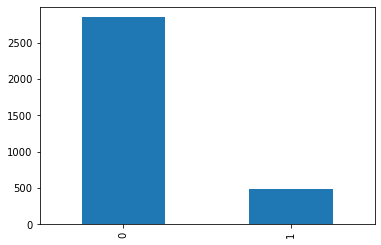

In [39]:
#가입 해지하지 않은 사람들의 비율이 많음
telco.Leave.value_counts().plot(kind='bar')

<AxesSubplot:>

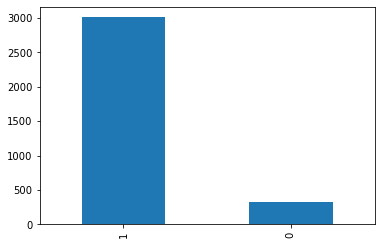

In [42]:
#가입 해지하지 않은 사람들의 비율이 많기 때문에 
#그만큼 갱신한 사람들의 수가 많음 
telco.NewContract.value_counts().plot(kind='bar')

<AxesSubplot:>

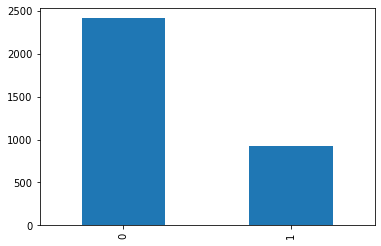

In [43]:
# 이동통신 사용자 중 데이터 요금제 사용을 하지 않은 사람들의 비율이 많음
# 그렇다면 데이터 요금제 사용하는 사용자들은 어느 특징을 가지고 있는지 살펴보기(분석 기준이 될 수 있음)
telco.IsData.value_counts().plot(kind='bar')

<AxesSubplot:>

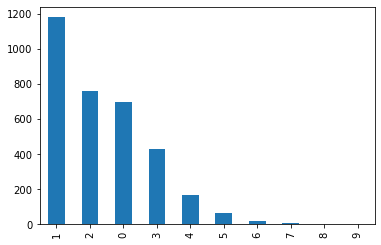

In [44]:
#고객센터 전화량의 경우 무조건 1번씩은 전화하지 않으며,
# 3번 이상 부터는 전화량의 건수가 매우 적어지고 있다.
telco.Callcenter.value_counts().plot(kind='bar')

<AxesSubplot:>

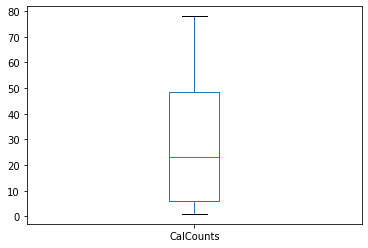

In [50]:
# 월 평균 전화수의 경우 사용자들은 평균적으로 약 20회 이상 전화를 하며, 주마다 5회 이상 통화를 한다고 볼 수 ㅣㅇㅆ음
telco.CalCounts.value_counts().plot(kind='box')

2. 수치형 데이터 값들

<AxesSubplot:ylabel='Frequency'>

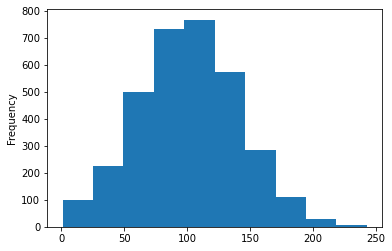

In [45]:
#가입기간의 경우 약 100-150week 분포가 제일 많음 [4weeks = 1month] [1week= 7day] 가정
telco.MemberWeeks.plot.hist()

<AxesSubplot:ylabel='Frequency'>

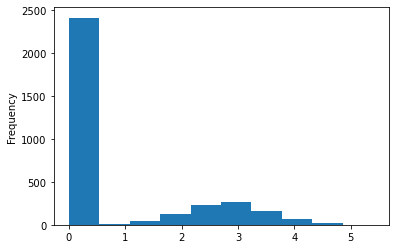

In [47]:
telco.DataAmount.plot.hist()

<AxesSubplot:ylabel='Frequency'>

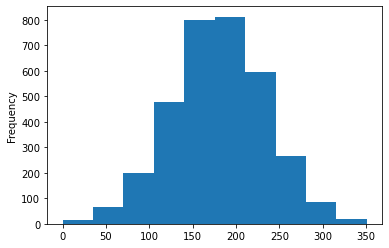

In [48]:
# 월 평균전화량의 경우 사용자들은 평균적으로 150-200분 통화함을 나타냄 
telco.CalMins.plot.hist()

<AxesSubplot:ylabel='Frequency'>

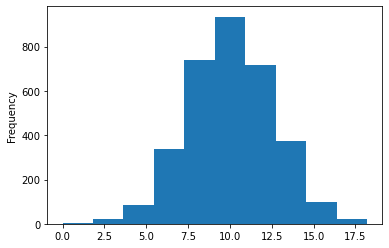

In [51]:
telco.OverFee.plot.hist()

<AxesSubplot:ylabel='Frequency'>

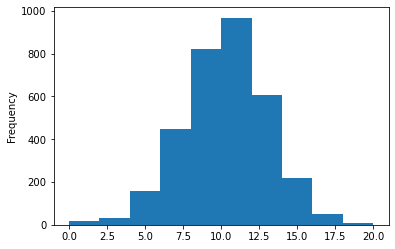

In [52]:
# 로밍 시간의 경우 10분에서 12분 30초 정도의 사용하는 사용자가 많음
telco.RoamingMin.plot.hist()

3. 열과 열의 비교 [연속형]

In [91]:
# 월 평균 전화량과 월 평균 전화 수에 대한 상관성

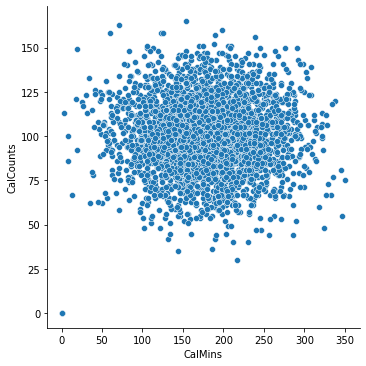

In [92]:
import seaborn as sns

sns.relplot(
    x='CalMins',
    y='CalCounts',
    data = telco, 
)

- 월 평균 전화 수가 높다고 해서 월 평균 전화량이 높은 것은 아님을 나타낸다.

- 가. 월 요금에 대한 비교

In [93]:
#월 요금과 초과요금에 대한 상관성

<AxesSubplot:xlabel='MonthlyFee', ylabel='OverFee'>

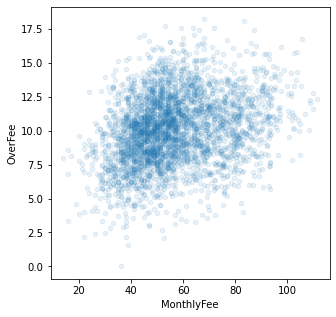

In [96]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 5))
telco.plot.scatter(
 x='MonthlyFee',
 y='OverFee',
 alpha=.1,
 ax=ax
)

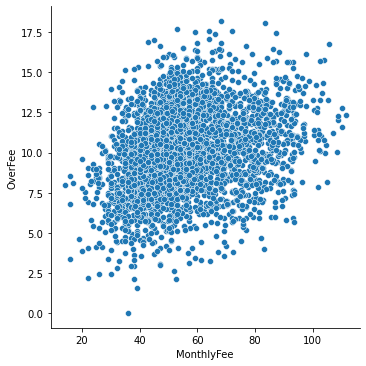

In [94]:
import seaborn as sns
sns.plot(
    x='MonthlyFee',
    y='OverFee',
    data = telco, 
)

In [77]:
# 데이터 사용량과 월 요금의 관계성과 경향성 시각화로 살펴보기 [데이터 사용량의 경우 데이터 요금제 여부가 있어야 하지 않을까? = (hue =IsData)]

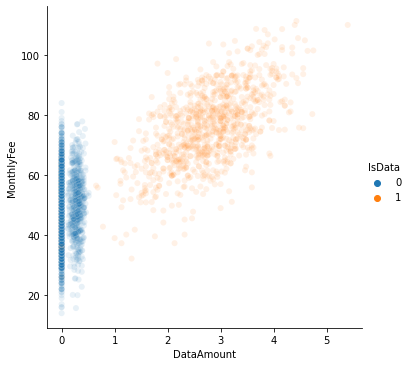

In [76]:
import seaborn as sns

sns.relplot(
    x='DataAmount',
    y='MonthlyFee',
    data = telco,
    hue='IsData', 
    alpha=.1,
)

- 데이터 요금제를 드는 사용자들의 경우,데이터 사용량에 따라 월요금이 상관성이 있음을 나타낸다. 즉 데이터 요금제 사용 여부를 나눠 분석을 진행을 해야함. 

In [78]:
# 월 평균 전화량(분)에 따른 월 요금의 관계성과 경향성 시각화로 살펴보기

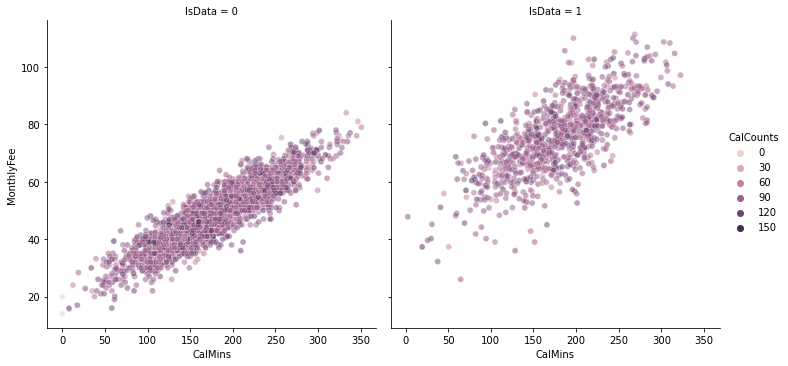

In [88]:
import seaborn as sns

sns.relplot(
    x='CalMins',
    y='MonthlyFee',
    data = telco,
    hue='CalCounts', 
    alpha=.5,
    col='IsData',
    col_order=[0, 1]
)

- 데이터 요금제를 들지 않는 사용자들의 경우 월 평균 전화량(분)에 따른 월 요금은 선형성을 가지고 있으나, 데이터 요금제를 드는 사람들의 경우 전화량이 늘어날 때, 월 요금의 증가형태가 아님을 보여준다.

#### ※ 데이터 요금제를 쓰는 사람들의 경우 데이터 사용량을 , 데이터 요금제를 들지 않는 사람들의 경우 월 평균 전화량을 가지고 "월 요금"을 분석하면 좋다.

- 나. 초과요금과 비교

In [ ]:
# 초과요금에 따른 로밍 시간 여부의 관계성과 경향성 시각화로 살펴보기

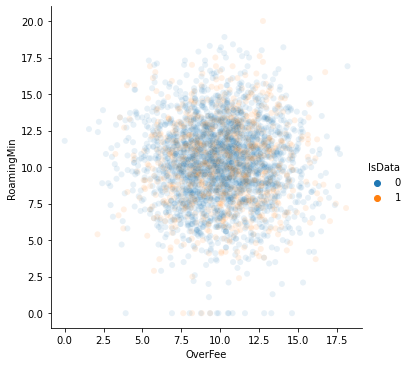

In [99]:
import seaborn as sns

sns.relplot(
    x='OverFee',
    y='RoamingMin',
    data = telco,
    hue='IsData', 
    alpha=.1,
)

In [ ]:
# 초과요금에 따른 월 전화량의 관계성과 경향성 시각화로 살펴보기

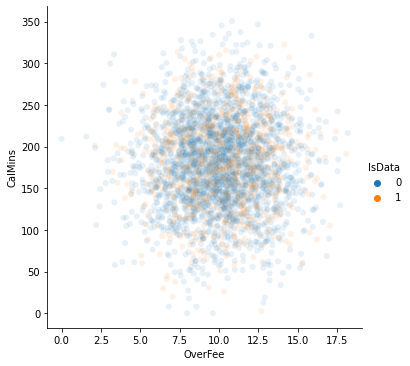

In [111]:
import seaborn as sns

sns.relplot(
    x='OverFee',
    y='CalMins',
    data = telco,
    hue='IsData', 
    alpha=.1,
)

In [ ]:
# 초과요금에 따른 월 전화 수의 관계성과 경향성 시각화로 살펴보기

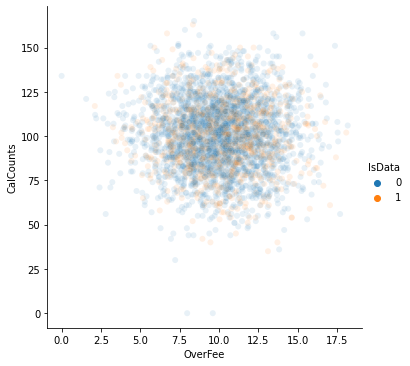

In [112]:
import seaborn as sns

sns.relplot(
    x='OverFee',
    y='CalCounts',
    data = telco,
    hue='IsData', 
    alpha=.1,
)

In [ ]:
# 초과요금에 따른 데이터 사용량 의 관계성과 경향성 시각화로 살펴보기

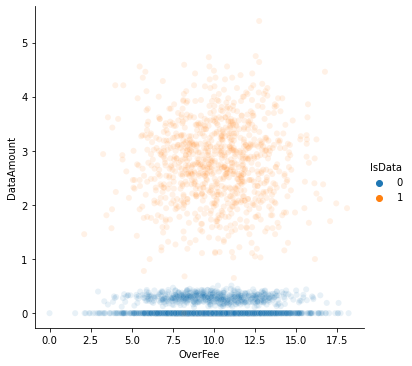

In [116]:
import seaborn as sns

sns.relplot(
    x='OverFee',
    y='DataAmount',
    data = telco,
    hue='IsData', 
    alpha=.1,
)

- 초과요금의 경우 데이터 사용량, 로밍 시간, 월 전화량과 뚜렷한 상관성이 나타나지 않는다.
-> 이 경우 유추해볼 수 있는 것은 데이터 요금제를 드는 경우 데이터 무제한 및 전화 무제한, 그리고 알뜰 요금제 등의 수단을 이통 통신 사용할 때 정하기 때문에 기존 요금에 대한 초과 요금이 잘 드는 경우가 없다고 볼 수 있다. 
-> 만약 요금제를 극한으로 제한했거나, 데이터요금제를 들지 않았는데 데이터 사용량이 있는 경우 그에 대한 초과요금이 들었을 확률이 크다. 
-> 로밍 시간에 경우 초과 요금에 유의미하게 혹은 비례하게 나타나지 않는 경우는, 로밍을 가는 것을 모든 사용자들에게 나타나는 양상이 아니며, 로밍에 대한 요금을 따로 내는 경우 (ex. 공기계, wifi기기)가 존재하기 때문이다. 

3. 열과 열의 비교 [연속형과 범주형]

In [ ]:
-가. 고객 센터 전화량 간

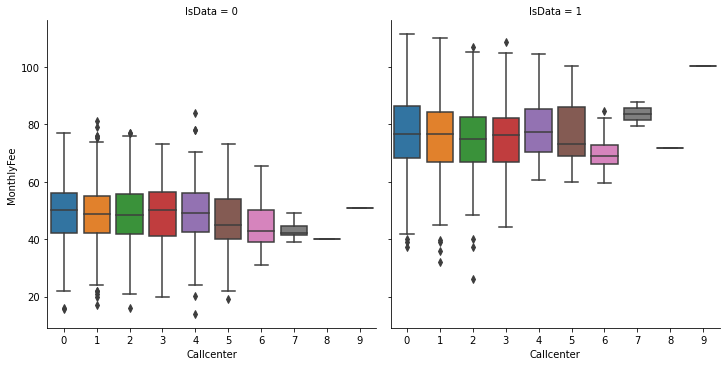

In [129]:
#고객 센터 전화량 간 월 요급 비교 
sns.catplot(x='Callcenter', y='MonthlyFee', col='IsData',
            col_order=[0, 1],
            data=telco, kind='box')

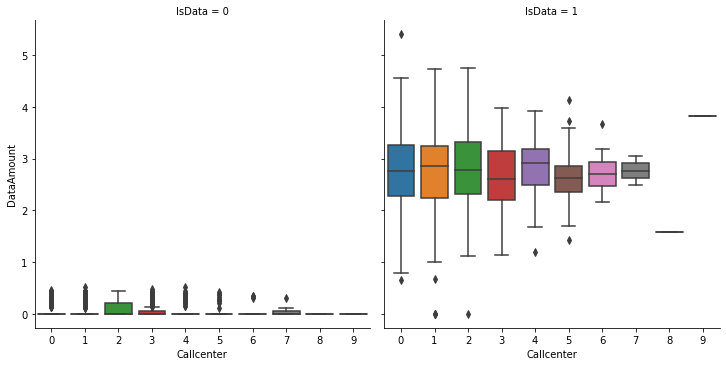

In [130]:
#고객 센터 전화량 간 데이터사용량 비교 
sns.catplot(x='Callcenter', y='DataAmount', col='IsData',
            col_order=[0, 1],data=telco, kind='box')

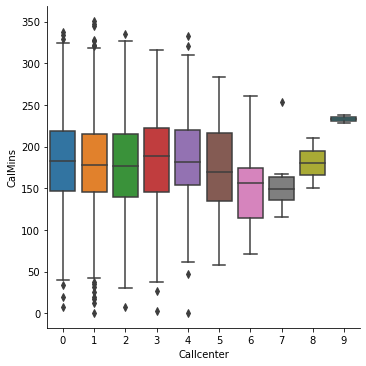

In [132]:
#고객 센터 전화량 간 월 평균 전화량 비교 
sns.catplot(x='Callcenter', y='CalMins',data=telco, kind='box')

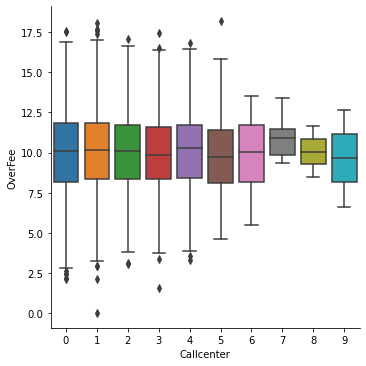

In [137]:
#고객 센터 전화량 간 초과 요금 비교 
sns.catplot(x='Callcenter', y='OverFee', data=telco, kind='box')

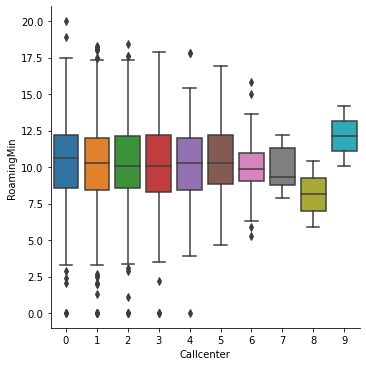

In [139]:
#고객 센터 전화량 간 로밍 비교 
sns.catplot(x='Callcenter', y='RoamingMin', data=telco, kind='box')

- 데이터 요금제를 들수록 고객 센터의 전화량의 경우가 늘어남을 catplot의 x, col에 각 변수를 주어 확인할 수 있었다. 

4. 열과 열의 비교 [범주형]

In [144]:
pd.crosstab(telco.Callcenter, telco.IsData)

IsData,0,1
Callcenter,,
0,504,193
1,837,344
2,544,215
3,331,98
4,124,42
5,49,17
6,13,9
7,7,2
8,1,1


<AxesSubplot:xlabel='Callcenter'>

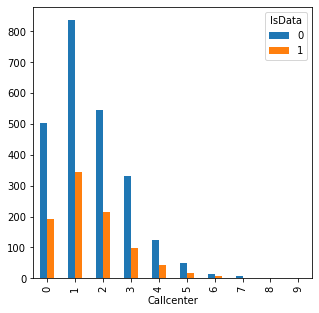

In [146]:
# crosstab 을 시각화합니다.
fig, ax = plt.subplots(figsize=(5,5))
(
 telco.pipe(lambda df_: pd.crosstab(df_.Callcenter, df_.IsData))
 .plot.bar(ax=ax)
)

- 위의 범주형 간 연속 값 비교와 범주형 간 비교 결과에서 고객 센터 전화량의 경우, 데이터 요금제를 들었을 경우 더 많음을 나타낸다고 할 수 있다.

### 데이터 그룹별 의미있는 집단 찾기 (최소, 최대)

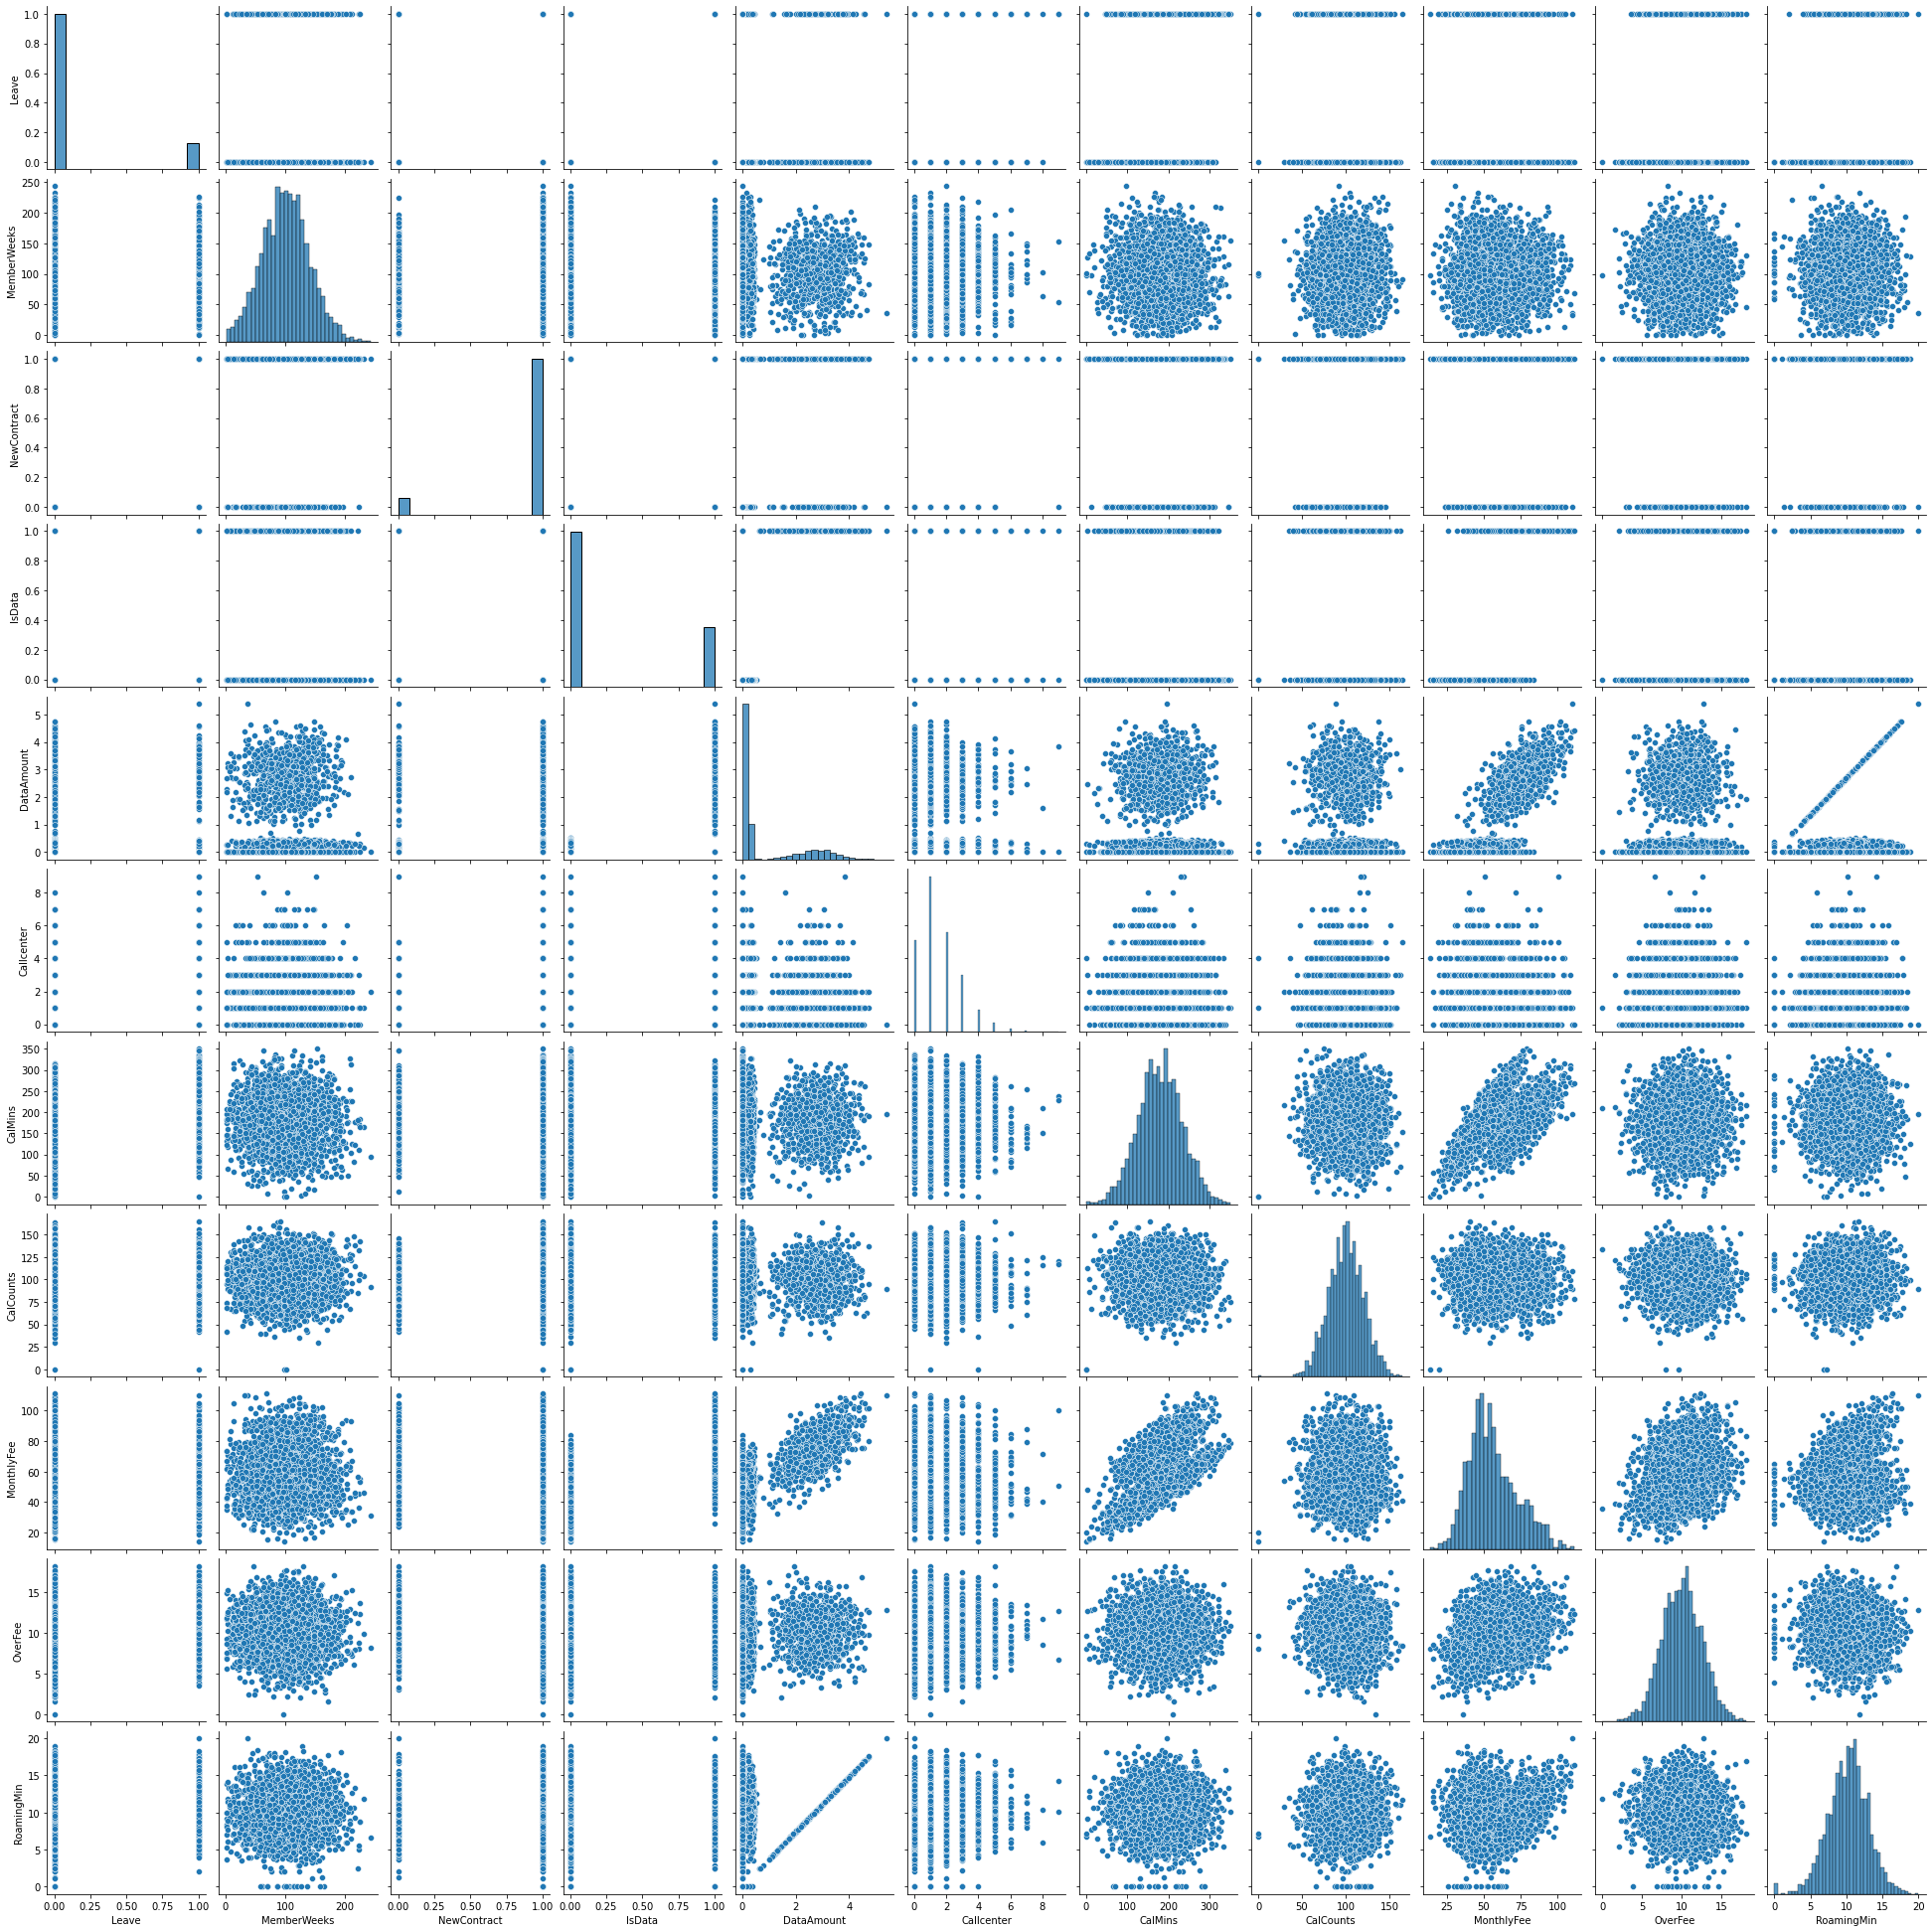

In [235]:
sns.pairplot(telco)
plt.show()

위에서 탐색적 데이터 분석 결과
1. 단일 칼럼 
- 가입 해지 이력이 있는 사람들은 드물다. 
- 그만큼 이동통신 서비스를 가입한 사용자들이 가입 후 갱신을 계속 한다, 
- 이동 통신 서비스를 사용하지만, 데이터 요금제를 들지 않은 경우들이 많다. 
- 고객센터에서 1번이상 전화한 사람이 3333명 중 약 2500명이 넘는다. ( == 즉, 한번쯤 전화해본 이력들이 있다. )
- 데이터 사용량의 경우 1GB 미만의 사용자들이 많다. == 이는 데이터 요금제를 들지 않는 사용자들이 포함되어 있어, 들지 않는 사람들의 경우 1GB 미만의 데이터를 썼을 것이라는 예상을 해볼 수 있다. 

2. 두 개 이상의 칼럼
- 데이터 사용량과 월요금의 관계성 시각화 결과, IsData =1인 사람들의 경우 데이터 사용량이 올라갈 수록 월 요금이 올라갔으나, 0인 사람들의 경우 데이터 사용량이 적음에도 월요금이 분포가 다양하게 나타나 있다. 
- 월 평균 전화량에 따른 월요금의 관계성은 반대로, IsData =0인 사용자들의 경우에서 (비례적인) 선형성이 나타나지만, 1인 경우 선형성이 보이지 않는 분포로 나타났다.
-  초과 요금의 경우 다른 열들과 뚜렷한 상관성을 나타내는 결과가 보이지 않았다.

분석 결과 
- 즉 데이터 요금제 여부의 따라 울 요금에 미치는 열이 다르며, 요금제를 드는 경우 데이터 사용량에 따른 월요금의 분포도를,  들지 않는 경우 전화량에 따른 월 요금의 분포도를 통해 분석하는 것이 좋다.
- 초과 요금의 분석 경우, 데이터 요금제를 드는 경우 데이터 무제한 및 전화 무제한, 그리고 알뜰 요금제 등의 수단을 이통 통신 사용할 때 정하기 때문에 기존 요금에 대한 초과 요금이 잘 드는 경우가 없다고 볼 수 있다. 
- 만약 요금제를 극한으로 제한했거나, 데이터요금제를 들지 않았는데 데이터 사용량이 있는 경우 그에 대한 초과요금이 들었을 확률이 크다. 
- 로밍 시간에 경우 초과 요금에 유의미하게 혹은 비례하게 나타나지 않는 경우는, 로밍을 가는 것을 모든 사용자들에게 나타나는 양상이 아니며, 로밍에 대한 요금을 따로 내는 경우 (ex. 공기계, wifi기기)가 존재하기 때문이다. 

In [ ]:
# 1.가입 해지 여부가 없는 사람 중 최대의 가입기간과 최소 데이터 사용량을 가진 사용자 10명의 데이터를 가져옴 [데이터 요금제 유무 상관 X]

In [69]:
#가입 해지를 하지 않았던 사람 = t1
t1 = telco.Leave == 0
#telco[t1] -> 총 2859의 사람이 존재
telco[t1].sort_values(['MemberWeeks', 'DataAmount'], ascending=[False,True]).head(10)

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
817,0,243,1,0,0.000000,2,95.5000,92,31.00000,8.187500,6.601562
1408,0,232,1,0,0.140015,1,165.6250,104,46.40625,9.796875,11.796875
1751,0,225,1,0,0.000000,1,182.7500,142,53.00000,12.328125,8.796875
1886,0,224,1,0,0.209961,3,111.3750,133,36.09375,8.750000,5.500000
3216,0,221,1,1,0.649902,0,180.5000,85,56.50000,11.210938,2.400391
1045,0,217,1,0,0.000000,4,176.3750,115,44.00000,7.941406,9.296875
2277,0,217,1,0,0.290039,0,123.6875,138,45.90625,12.429688,13.296875
238,0,215,1,0,0.310059,0,83.6250,148,28.09375,6.050781,10.703125
1387,0,212,1,0,0.000000,1,126.0000,96,34.00000,7.218750,7.601562
1093,0,210,1,0,0.280029,2,104.6250,121,33.81250,7.480469,6.500000


In [ ]:
# 1-1.가입 해지 여부가 없는 사람 중 최대의 가입기간과 최소 데이터 사용량을 가진 사용자 10명의 데이터를 가져옴 [데이터 요금제 유무 상관 O]

In [148]:
t1_1 = telco.IsData == 1  # 데이터 요금제 드는 사람 
t1_2 = telco.IsData == 0  # 데이터 요금제 들지 않는 사람

In [149]:
t1_all = t1 & t1_1
telco[t1_all].sort_values(['MemberWeeks', 'DataAmount'], ascending=[False,True]).head(10)

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
3216,0,221,1,1,0.649902,0,180.5000,85,56.50000,11.210938,2.400391
2259,0,210,1,1,2.730469,3,313.7500,87,93.31250,7.390625,10.101562
928,0,205,1,1,2.109375,2,175.7500,139,65.12500,7.750000,7.800781
1781,0,201,1,1,4.078125,1,192.0000,97,93.81250,11.960938,15.101562
290,0,199,1,1,2.160156,0,230.6250,121,79.62500,10.968750,8.000000
1909,0,195,1,1,3.269531,0,231.7500,110,91.68750,11.257812,12.101562
2709,0,193,1,1,3.160156,0,71.1875,58,54.59375,6.238281,11.703125
510,0,193,1,1,3.320312,1,124.0000,102,72.18750,10.148438,12.296875
3328,0,192,1,1,2.669922,2,156.2500,77,71.68750,10.781250,9.898438
537,0,190,1,1,2.300781,0,166.5000,93,67.00000,9.148438,8.500000


In [150]:
t1_all = t1 & t1_2
telco[t1_all].sort_values(['MemberWeeks', 'DataAmount'], ascending=[False,True]).head(10)

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
817,0,243,1,0,0.000000,2,95.5000,92,31.00000,8.187500,6.601562
1408,0,232,1,0,0.140015,1,165.6250,104,46.40625,9.796875,11.796875
1751,0,225,1,0,0.000000,1,182.7500,142,53.00000,12.328125,8.796875
1886,0,224,1,0,0.209961,3,111.3750,133,36.09375,8.750000,5.500000
1045,0,217,1,0,0.000000,4,176.3750,115,44.00000,7.941406,9.296875
2277,0,217,1,0,0.290039,0,123.6875,138,45.90625,12.429688,13.296875
238,0,215,1,0,0.310059,0,83.6250,148,28.09375,6.050781,10.703125
1387,0,212,1,0,0.000000,1,126.0000,96,34.00000,7.218750,7.601562
1093,0,210,1,0,0.280029,2,104.6250,121,33.81250,7.480469,6.500000
309,0,209,1,0,0.000000,3,227.2500,128,61.00000,12.921875,8.898438


In [ ]:
# 2. 데이터 요금제를 드는 사람 중 최대의 가입 기간과 최소 데이터 사용량을 가진 사람들 사용자 데이터 가져오기

- 최대의 가입 기간에 대한 조건을 같이 널어놓은 결과, 데이터 요금제, 데이터 사용량, 월요금에 대한 뚜렷한 그룹화가 나오지 않음.
- 조건을 달리하여, 이번엔 데이터 요금제 유무에 따라 데이터 사용량, 월요금, 초과 요금에 대한 그룹화를 시도함
1. 데이터 사용량 많은 순, 초과요금이 적은 순으로 

In [ ]:
# 2-1.데이터 요금제를 들지 않는 사람 중 최대 데이터 사용량과 최소의 초과요금을 가진 사람들 사용자 데이터 가져오기

In [152]:
#필요한 열만 가지고 오기 
telData = telco[['Leave','IsData','DataAmount','MonthlyFee','OverFee']]

In [153]:
t2_1 = telData.IsData == 0
telData[t2_1].sort_values(['DataAmount', 'OverFee'], ascending=[False,True])

,Leave,IsData,DataAmount,MonthlyFee,OverFee
350,0,0,0.509766,54.09375,10.242188
263,0,0,0.509766,53.09375,11.062500
962,0,0,0.469971,53.68750,7.511719
1090,0,0,0.459961,47.59375,9.929688
1092,0,0,0.449951,50.50000,8.523438
...,...,...,...,...,...
580,1,0,0.000000,66.00000,17.375000
302,1,0,0.000000,59.00000,17.531250
1601,1,0,0.000000,72.00000,17.546875
2551,0,0,0.000000,53.00000,17.703125


In [154]:
t2_1 = telData.IsData == 1
telData[t2_1].sort_values(['DataAmount', 'OverFee'], ascending=[False,True])

,Leave,IsData,DataAmount,MonthlyFee,OverFee
115,1,1,5.398438,110.0000,12.750000
2229,0,1,4.750000,101.5000,12.539062
515,0,1,4.730469,80.3125,9.687500
469,0,1,4.640625,101.3750,12.750000
2687,1,1,4.589844,104.8750,8.187500
...,...,...,...,...,...
3216,0,1,0.649902,56.5000,11.210938
595,0,1,0.000000,39.0000,7.621094
3275,0,1,0.000000,36.0000,8.187500
343,0,1,0.000000,26.0000,8.812500


In [168]:
telData_Fee = telData.assign(MsubOFee = lambda x : (x['MonthlyFee']- x['OverFee']))
telData_Fee
TData = telData_Fee[t2_1].sort_values(['DataAmount', 'OverFee'], ascending=[False,True])
TData

,Leave,IsData,DataAmount,MonthlyFee,OverFee,MsubOFee
115,1,1,5.398438,110.0000,12.750000,97.250000
2229,0,1,4.750000,101.5000,12.539062,88.960938
515,0,1,4.730469,80.3125,9.687500,70.625000
469,0,1,4.640625,101.3750,12.750000,88.625000
2687,1,1,4.589844,104.8750,8.187500,96.687500
...,...,...,...,...,...,...
3216,0,1,0.649902,56.5000,11.210938,45.289062
595,0,1,0.000000,39.0000,7.621094,31.378906
3275,0,1,0.000000,36.0000,8.187500,27.812500
343,0,1,0.000000,26.0000,8.812500,17.187500


In [170]:
TData.sample(100, random_state = 40).sort_values('DataAmount', ascending = False)

,Leave,IsData,DataAmount,MonthlyFee,OverFee,MsubOFee
115,1,1,5.398438,110.00000,12.750000,97.250000
2096,0,1,4.351562,93.50000,5.671875,87.828125
2616,0,1,4.320312,81.18750,10.671875,70.515625
897,0,1,4.191406,95.87500,10.031250,85.843750
2402,1,1,4.128906,84.31250,10.609375,73.703125
...,...,...,...,...,...,...
1600,0,1,1.219727,59.18750,11.546875,47.640625
1512,0,1,1.129883,64.31250,11.093750,53.218750
1468,0,1,1.129883,49.31250,10.343750,38.968750
2946,0,1,1.110352,57.09375,12.320312,44.773438


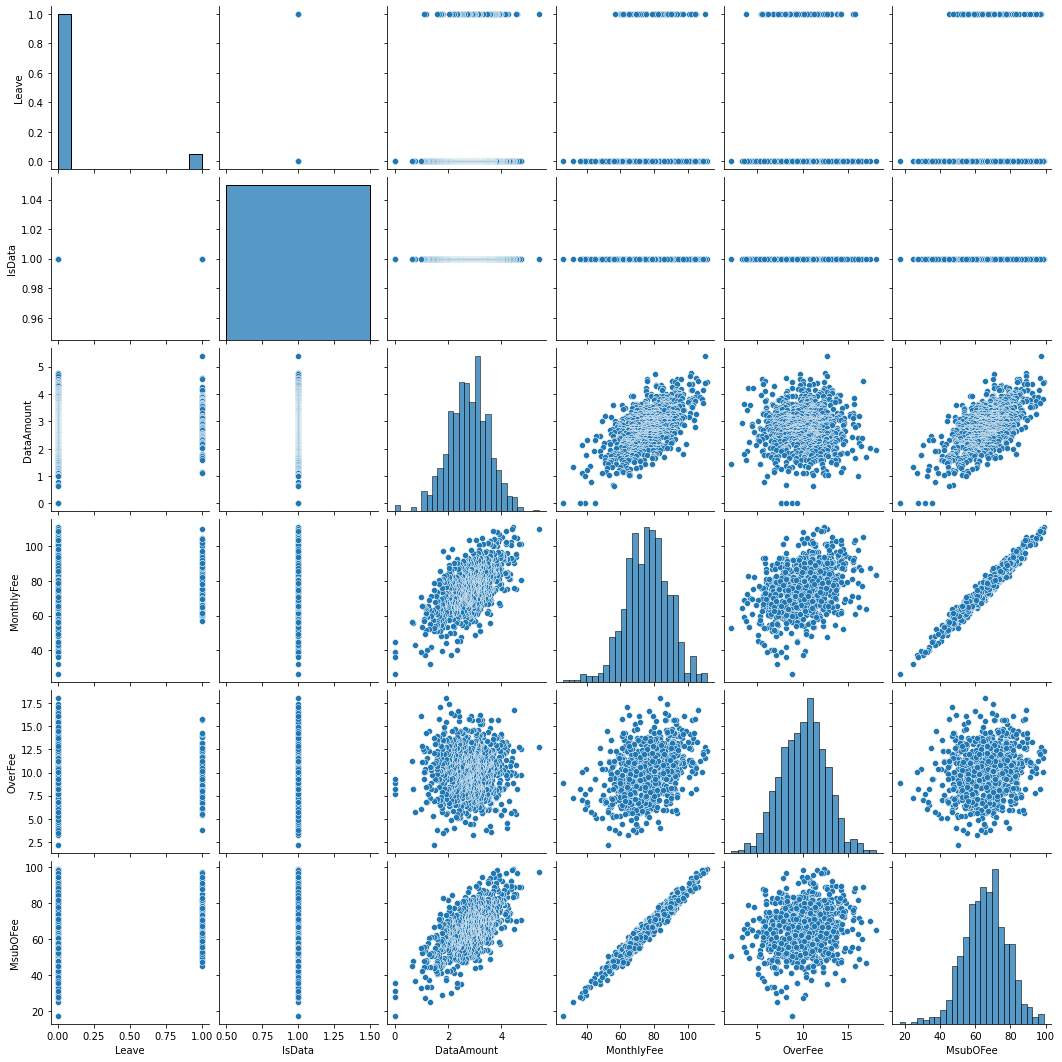

In [233]:
sns.pairplot(TData)
plt.show()

- 데이터 요금제를 들지 않은 사용자들의 경우 데이터 사용량이 많고, 초과요금이 적게 한 그룹화 결과, 월 요금 상관성은 보이지 않는다. 반면, 요금제를 들었을 때, 다른 사용자들과 비슷한 데이터 사용량을 쓰면서, 초과요금이 적은 사용자들의 경우 초과요금을 빼더라도 월요금의 비율이 상대적으로 많다고 할 수 있다.

##### 요금제를 드는 경우 데이터 사용량에 따른 월요금의 분포도를,  들지 않는 경우 전화량에 따른 월 요금의 분포도를 통해 분석하는 것이 좋다라고 했으므로 들지 않은 경우는 그룹화를 월 평균전화량을 포함해서 그룹화를 시도했다.

In [ ]:
# 3.데이터 요금제를 들지 않는 사람 중 최대 월 평균 전화량 과 월 요금을 가진 사람들 사용자 데이터 가져오기

In [177]:
#필요한 열만 가지고 오기 
telColFee = telco[['IsData','CalMins','CalCounts','MonthlyFee','OverFee']]

In [178]:
t3 = telColFee.IsData == 0
# 한번 통화할 떄 통화하는 전화량(분) = CalMins2
telCol = telColFee.assign(CalMins2 = lambda x : (x['CalMins'] / x['CalCounts']))

In [179]:
telCol

,IsData,CalMins,CalCounts,MonthlyFee,OverFee,CalMins2
0,1,265.000,110,89.00000,9.867188,2.409091
1,1,161.625,123,82.00000,9.781250,1.314024
2,0,243.375,114,52.00000,6.058594,2.134868
3,0,299.500,71,57.00000,3.099609,4.218310
4,0,166.750,113,41.00000,7.421875,1.475664
...,...,...,...,...,...,...
3328,1,156.250,77,71.68750,10.781250,2.029221
3329,0,231.125,57,56.40625,7.671875,4.054824
3330,0,180.750,109,56.00000,14.437500,1.658257
3331,0,213.750,105,50.00000,7.980469,2.035714


In [182]:
telCol[t3].sort_values(['MonthlyFee', 'CalMins'], ascending=[False,False])

,IsData,CalMins,CalCounts,MonthlyFee,OverFee,CalMins2
15,0,333.000000,67,84.000000,15.890625,4.970149
985,0,346.750000,55,81.000000,12.476562,6.304545
365,0,350.750000,75,79.000000,10.828125,4.676667
3322,0,321.000000,105,78.000000,13.281250,3.057143
2660,0,301.500000,136,77.875000,12.890625,2.216912
...,...,...,...,...,...,...
2252,0,17.593750,121,17.000000,8.093750,0.145403
2859,0,58.000000,125,16.000000,3.380859,0.464000
2753,0,7.800781,86,16.000000,8.570312,0.090707
1986,0,7.898438,100,15.703125,6.820312,0.078984


- IsData =0인 사용자들의 경우에서 월 통화량(분)에 따른 월 요금이 대부분 비례적인 선형성이 나타나지만 무조건적으로 통화량이 많을수록 월요금이 높은 것아님을 위의 표에서 나타난다. 
- 이유를 예측해보면, 초과요금의 다양한 요인, 로밍 시간, 데이터요금제를 들지 않았지만 데이터 사용량이 있는 등의 요인들이 존재하기 때문에 완벽한 비례관계가 나타나지 않는다고 본다. 

In [193]:
telColAll = telco[['IsData','CalMins','CalCounts','MonthlyFee','OverFee','RoamingMin','DataAmount']]

In [208]:
#로밍 시간 = 0.0
t3_1 = telColAll.RoamingMin == 0
#데이터 사용량 = 0.0
t3_2 = telColAll.DataAmount == 0

t3_all = t3&t3_1&t3_2
telColAll[t3&t3_1&t3_2].head(5)

,IsData,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin,DataAmount
179,0,232.125,122,65.0,14.617188,0.0,0.0
488,0,242.875,126,60.0,10.492188,0.0,0.0
878,0,281.000,66,62.0,8.031250,0.0,0.0
1028,0,222.750,114,57.0,10.796875,0.0,0.0
1080,0,191.500,88,48.0,8.757812,0.0,0.0


In [202]:
telCol[t3_all].style.highlight_max(axis= 0)

,IsData,CalMins,CalCounts,MonthlyFee,OverFee,CalMins2
179,0,232.125000,122,65.000000,14.617188,1.902664
488,0,242.875000,126,60.000000,10.492188,1.927579
878,0,281.000000,66,62.000000,8.031250,4.257576
1028,0,222.750000,114,57.000000,10.796875,1.953947
1080,0,191.500000,88,48.000000,8.757812,2.176136
1400,0,132.000000,90,40.000000,9.882812,1.466667
2345,0,288.000000,101,61.000000,6.898438,2.851485
2733,0,172.375000,114,52.000000,12.828125,1.512061
2918,0,174.375000,112,53.000000,13.289062,1.556920
3290,0,107.875000,128,35.000000,9.351562,0.842773


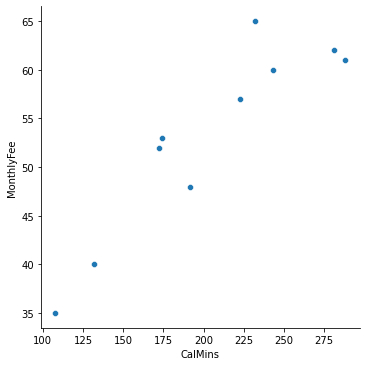

In [206]:
import seaborn as sns

sns.relplot(
    x='CalMins',
    y='MonthlyFee',
    data = telCol[t3_all]
)

- 로밍 시간 = 0 (== 로밍으로 쓴 돈이 표면적으로 없음), 데이터 사용량 = 0.0 으로 조건으로 두고 확인해 본 결과, 좀 더 명확한 상관성이 뚜렷하게 나타나지만,  무조건적으로 통화량이 많을수록 월요금이 높은 것이 아닌 결론을 나타낸다. 
- 또한 조건을 많이 줌으로써 나타나는 데이터 셋이 10개 밖에 되지 않아, 만약 위의 조건을 준 데이터 셋이 100개 이상 1000개 이상이 존재했다면 위의 그래프보다 더 상관성이 있고, 유의미한 결과가 나타났을 것이라고 생각한다.

In [210]:
# 초과금액 =0.0과 아닌 금액들의 조건을 주어 그룹화를 진행하려고 했으나, 초과금액 = 0.0인 데이터가 1개임. 
# 이 데이터의 경우 분석하면, 요금제를 사용하지 않으며 데이터 사용량이 없음에도 월 요금이 36.0로 로밍과 월 평균 통화량이 약 210분(3시간 30분)을 기록한 한 사용자의 데이터 셋이다. 
t4 = telco.OverFee == 0

In [211]:
telco[t4]

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
2932,0,97,1,0,0.0,1,209.25,134,36.0,0.0,11.796875


In [225]:
t4_1 = 11< telco.RoamingMin
t4_2 = telco.RoamingMin <12
#데이터 사용량 = 0.0
t4_3 = telco.DataAmount == 0
#데이터 요금제 = X
t4_4 = telco.IsData == 0

t4_all =telco[t4_1&t4_2&t4_3&t4_4]

In [227]:
t4_all

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
12,0,168,1,0,0.0,1,128.750,96,31.0,5.250000,11.203125
33,1,12,1,0,0.0,1,249.625,118,64.0,12.617188,11.796875
39,0,149,1,0,0.0,1,140.375,94,47.0,13.593750,11.101562
52,0,10,1,0,0.0,2,186.125,112,48.0,9.507812,11.398438
60,0,174,1,0,0.0,1,192.125,97,48.0,8.500000,11.398438
...,...,...,...,...,...,...,...,...,...,...,...
3285,0,57,1,0,0.0,0,158.125,117,37.0,5.761719,11.796875
3295,0,110,1,0,0.0,1,227.750,88,54.0,8.500000,11.703125
3322,1,62,1,0,0.0,4,321.000,105,78.0,13.281250,11.500000
3324,0,159,1,0,0.0,1,169.750,114,46.0,9.890625,11.601562


<AxesSubplot:>

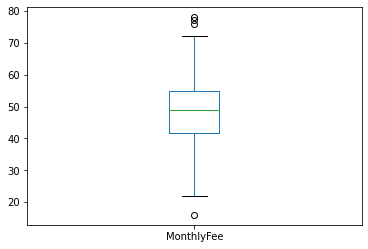

In [229]:
t4_all.MonthlyFee.plot.box()

초과금액 =0.0 인 사용자의 데이터 =(a)와 비슷한 로밍 시간 대, 데이터 사용량 = 0.0, 데이터 요금제 = X인 사용자 데이터 셋들의 비교를 하면 
a와 비슷한 월 평균 금액을 가지고 있는 사람들이 적으며, 평균적으로 약 50.0의 금액을 내고 있음을 알 수 있다. 

### 분석 결론

- 요금제를 드는 경우 데이터 사용량에 따른 월요금의 분포도를, 들지 않는 경우 전화량에 따른 월 요금의 분포도를 통해 분석한 결과 
- 요금제를 드는 경우 데이터 사용량을 많이 쓰는 경우 월요금이 증가하며, 들지 않는 경우월 평균 전화량을 많이 쓰는 경우 월 요금이 증가한다는 결론을 낼 수 있었다. 
- 요금제를 들었을 때, 다른 사용자들과 비슷한 데이터 사용량을 쓰면서, 초과요금이 적은 사용자들의 경우 초과요금을 빼더라도 월요금의 비율이 상대적으로 많았다. 
____________________________________________________________________________________________________________________________________________________________________
(IsData 여부가 나뉘었을 때)
- 월 통화량(분) 혹은 데이터 사용량 에 따른 월 요금이 비례적인 선형성이 나타나지만 무조건적으로 통화량이 많을수록 월요금이 높은 것이 아니였다. 
- 이는 다양한 요인이 있는데, 초과 요금 , 로밍 시간, 데이터요금제가 직접적으로 관계가 나타나나진 않았지만, 데이터 사용량이 있는 등의 요인들이 존재하기 때문에 완벽한 비례관계가 나타나지 않는다고 할 수 있다.

- 예로 월 평균 통화량과 월요금의 데이터 분석에서 로밍 시간 = 0 (== 로밍으로 쓴 돈이 표면적으로 없음), 데이터 사용량 = 0.0 으로 조건으로 두고 확인해 본 결과, 좀 더 명확한 상관성이 뚜렷하게 나타나지만,  무조건적으로 통화량이 많을수록 월요금이 높은 것이 아닌 결론을 나타났다. 
- 즉 여기에 있는 열들을 제외하고도, 데이터 요금제를 드는 경우 데이터 무제한 및 전화 무제한, 그리고 알뜰 요금제 등의 수단을 이통 통신 사용할 때 정하기 때문에 월 요금에 대한 높은 상관성과 비례적인 관계를 하나만 집어서 말할 수 없다. 
- 만약 요금제(통화 요금제 및 데이터 요금제 포함)를 극한으로 제한했거나, 데이터요금제를 들지 않았는데 데이터 사용량이 있는 경우 그에 대한 월 요금이 늘어났거나, 초과요금이 생기는 경우가 존재할 수 있음을 예상해볼 수 있다. 